### Figure 5 - Monthly Air Temperature Anomalies

Monthly surface air temperature anomalies observed at Ilulissat Mittarfik (IM), calculated relative to the 1992-2018 mean. 

In [1]:
# IMPORT MODULES
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np 
import datetime
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable

In [5]:
# OPEN THE AIR TEMPERATURE ANOMALY DATA CSV
ilulissat_2018_2023_anomaly = pd.read_csv('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/422100_ilulissat_air_temp_anomalies.csv')

# CONVERT THE DATE COLUMN TO DATETIME
ilulissat_2018_2023_anomaly['Date'] = pd.to_datetime(ilulissat_2018_2023_anomaly['Date'])

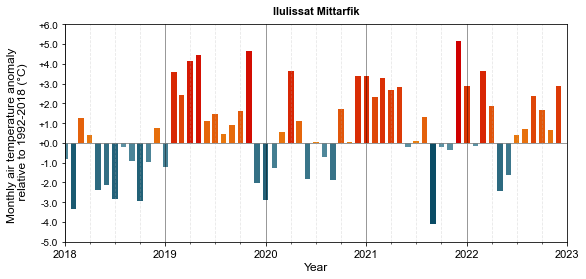

In [7]:
# PLOT AIR TEMPERATURE ANOMALY GRAPH FOR ILULISSAT MITTAFIK 
plt.rcParams["font.family"] = "Arial"
fig, ax = plt.subplots(figsize=(9, 4))
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.8) 
plt.grid(axis = 'x', alpha=0.5, linestyle='-', color='black')
ax.xaxis.grid(True, which='minor', linestyle='--', alpha=0.3)
plt.title('Ilulissat Mittarfik', pad=10, fontsize=11, fontweight='bold')
plt.ylabel("Monthly air temperature anomaly \n relative to 1992-2018 (\u00B0C)", labelpad=10, fontsize=12, linespacing=1.1) 
plt.xlabel('Year', labelpad=3, fontsize=12)

# FORMAT THE X-AXIS TICK LIMITS  
year_locator = mdates.YearLocator(base=1, month=1, day=1)
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
min_x_value = pd.to_datetime('2018-01-01', format='%Y-%m-%d')
max_x_value = pd.to_datetime('2023-01-01', format='%Y-%m-%d')
plt.xlim(min_x_value, max_x_value)
three_month_intervals = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(three_month_intervals)

# SET THE Y AXIS TICK LIMITS, ADDING A '+' BEFORE POSITIVE VALUES 
plt.ylim(-5, 6)
plt.yticks(np.arange(-5, 6+1, 1))
def format_positive(value, tick_number):
    if value >= 0:
        return f'+{value:.1f}'
    else:
        return f'{value:.1f}'
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_positive))

# DEFINE A CUSTOM BLUE & RED COLOUR MAP 
blue_cmap = LinearSegmentedColormap.from_list('custom_blue', ['#0a4c65', '#caf0f8'], N=256)
red_cmap = LinearSegmentedColormap.from_list('custom_red', ['#ffe81a', '#d00000'], N=256)
norm = plt.Normalize(ilulissat_2018_2023_anomaly['monthly_temp_anomaly_relative_1992_2018'].min(), ilulissat_2018_2023_anomaly['monthly_temp_anomaly_relative_1992_2018'].max())

# PLOT THE DATA WITH THE CUSTOM COLOUR MAPS
for index, row in ilulissat_2018_2023_anomaly.iterrows():
    anomaly_value = row['monthly_temp_anomaly_relative_1992_2018']
    if not pd.isna(anomaly_value):
        color = red_cmap(norm(anomaly_value)) if anomaly_value >= 0 else blue_cmap(norm(anomaly_value))
        ax.bar(row['Date'], anomaly_value, width=20, color=color)

ax.tick_params(axis='x', labelsize=11)
#plt.savefig('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/figures/figure_5.png', dpi=300)